# Pre-processing CoV Dataset

## Mehrdad Heshmat

### Section 1: Importing Required Libraries

In [1]:
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline
pd.set_option("display.max_rows",None,"display.max_columns",None)


### Initializing output-paths:

In [2]:
import os
if not os.path.isdir(".\\output") or not os.path.isdir(".\\output\\charts"):
    try:
        os.makedirs(".\\output\\charts")
        os.makedirs(".\\output\\preprocessed_Dataframe")
        
    except FileExistsError:
        print(FileExistsError)

### Section 2: Loading the Data & Exploring It

In [3]:
df  = pd.read_csv(".\SARS-CoV-2 Dataset.csv")

In [4]:
df.shape

(121953, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121953 entries, 0 to 121952
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   continent                116402 non-null  object 
 1   location                 121953 non-null  object 
 2   date                     121953 non-null  object 
 3   total_cases              115720 non-null  float64
 4   total_deaths             104903 non-null  float64
 5   total_vaccinations       28228 non-null   float64
 6   people_vaccinated        26813 non-null   float64
 7   people_fully_vaccinated  23715 non-null   float64
 8   population               121088 non-null  float64
dtypes: float64(6), object(3)
memory usage: 8.4+ MB


### Task1:


In [6]:
df['total_vaccinations']=df['total_vaccinations'].fillna(0)
df['people_vaccinated']=df['people_vaccinated'].fillna(0)
df['people_fully_vaccinated']=df['people_fully_vaccinated'].fillna(0)


In [7]:
df = df[df.location != 'International']
df = df[df.location !=  'Northern Cyprus']

In [8]:
countries_set = set(df.location)
for cont in countries_set:
    df.loc[(df.location == cont) ,'people_fully_vaccinated' ]=df.loc[(df.location == cont)]['people_fully_vaccinated'].replace(0 ,method='ffill')
    df.loc[(df.location == cont) ,'total_vaccinations' ]=df.loc[(df.location == cont)]['total_vaccinations'].replace(0 ,method='ffill')


In [9]:
df.to_csv('output\\preprocessed_Dataframe\\' + 'preprocessed_df-Stage 1.csv')

### Task2:

In [10]:
df['people_fully_vaccinated_per_population'] = (df.people_fully_vaccinated * 100) / df.population
df['total_deaths_per_population'] = (df.total_deaths * 100) / df.population
df['total_cases_per_population'] = (df.total_cases * 100) / df.population



In [11]:
df['people_fully_vaccinated_per_population']= df['people_fully_vaccinated_per_population'].fillna(0)
df['total_deaths_per_population'] = df['total_deaths_per_population'].fillna(0)
df['total_cases_per_population']=df['total_cases_per_population'].fillna(0)
df['total_deaths']=df['total_deaths'].fillna(0)
df['total_cases']=df['total_cases'].fillna(0)

In [12]:
df.to_csv('output\\preprocessed_Dataframe\\' + 'preprocessed_df-Stage 2.csv')

### Task3:

In [13]:
pval0=ttest_rel(df.total_cases_per_population , df.people_fully_vaccinated_per_population).pvalue
pval1=ttest_rel(df.total_deaths_per_population , df.people_fully_vaccinated_per_population).pvalue
pval2=ttest_rel(df.total_cases , df.people_fully_vaccinated).pvalue
pval3=ttest_rel(df.total_deaths , df.people_fully_vaccinated).pvalue

tests= [pval0,pval1,pval2,pval3]
for i in range(0,len(tests)):
    if tests[i] < 0.05:
        tests[i]='True'
    else:
        tests[i]='False'

print(str(ttest_rel(df.total_cases_per_population , df.people_fully_vaccinated_per_population)) +'\t' +tests[0])
print(str(ttest_rel(df.total_deaths_per_population , df.people_fully_vaccinated_per_population)) +'\t' + tests[1])
print(str(ttest_rel(df.total_cases , df.people_fully_vaccinated))+'\t' + tests[2])
print(str(ttest_rel(df.total_deaths , df.people_fully_vaccinated))+'\t' + tests[3])




Ttest_relResult(statistic=-110.8718723118993, pvalue=0.0)	True
Ttest_relResult(statistic=-139.5745329798607, pvalue=0.0)	True
Ttest_relResult(statistic=-21.903759426679166, pvalue=3.850204333129979e-106)	True
Ttest_relResult(statistic=-26.825800299680097, pvalue=4.702304984026628e-158)	True


### Task4:

In [14]:
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')

In [15]:
print(set(df.location))

{'Cayman Islands', 'Bolivia', 'Mauritania', 'Bosnia and Herzegovina', 'Suriname', 'Finland', 'Isle of Man', 'Maldives', 'Portugal', 'Ecuador', 'South Korea', 'Spain', 'Uganda', 'Ukraine', 'Jordan', 'Aruba', 'Georgia', 'Anguilla', 'El Salvador', 'Indonesia', 'Marshall Islands', 'Africa', 'Eritrea', 'Egypt', 'Bonaire Sint Eustatius and Saba', 'Taiwan', 'Azerbaijan', 'Mongolia', 'Zambia', 'Madagascar', 'Belarus', 'Pakistan', 'Qatar', 'Philippines', 'Sweden', 'Ethiopia', 'Mexico', 'Yemen', 'Iran', 'Tanzania', 'Brunei', 'Europe', 'Cambodia', 'Fiji', 'Uzbekistan', 'Somalia', 'Greenland', 'Iraq', 'Mali', 'Kazakhstan', 'Guinea', 'Moldova', 'Timor', 'Papua New Guinea', 'New Caledonia', 'Slovakia', "Cote d'Ivoire", 'Bhutan', 'Nigeria', 'Italy', 'Andorra', 'Burundi', 'Denmark', 'Tuvalu', 'Norway', 'Laos', 'World', 'Comoros', 'Netherlands', 'Uruguay', 'Gabon', 'Rwanda', 'United Kingdom', 'Australia', 'Micronesia (country)', 'Sri Lanka', 'Kyrgyzstan', 'Turkey', 'United States', 'Venezuela', 'Domini

In [16]:
sample_countries= ['Iran','Turkey','Brazil']

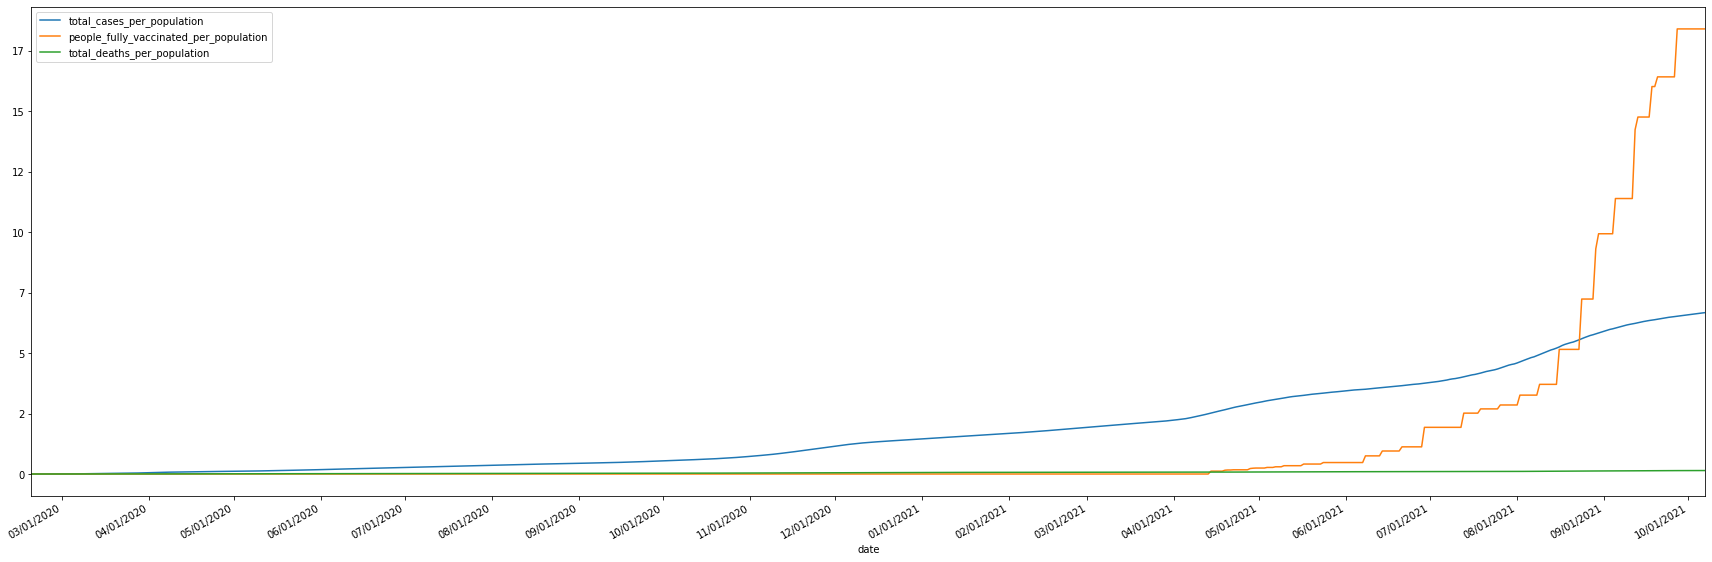

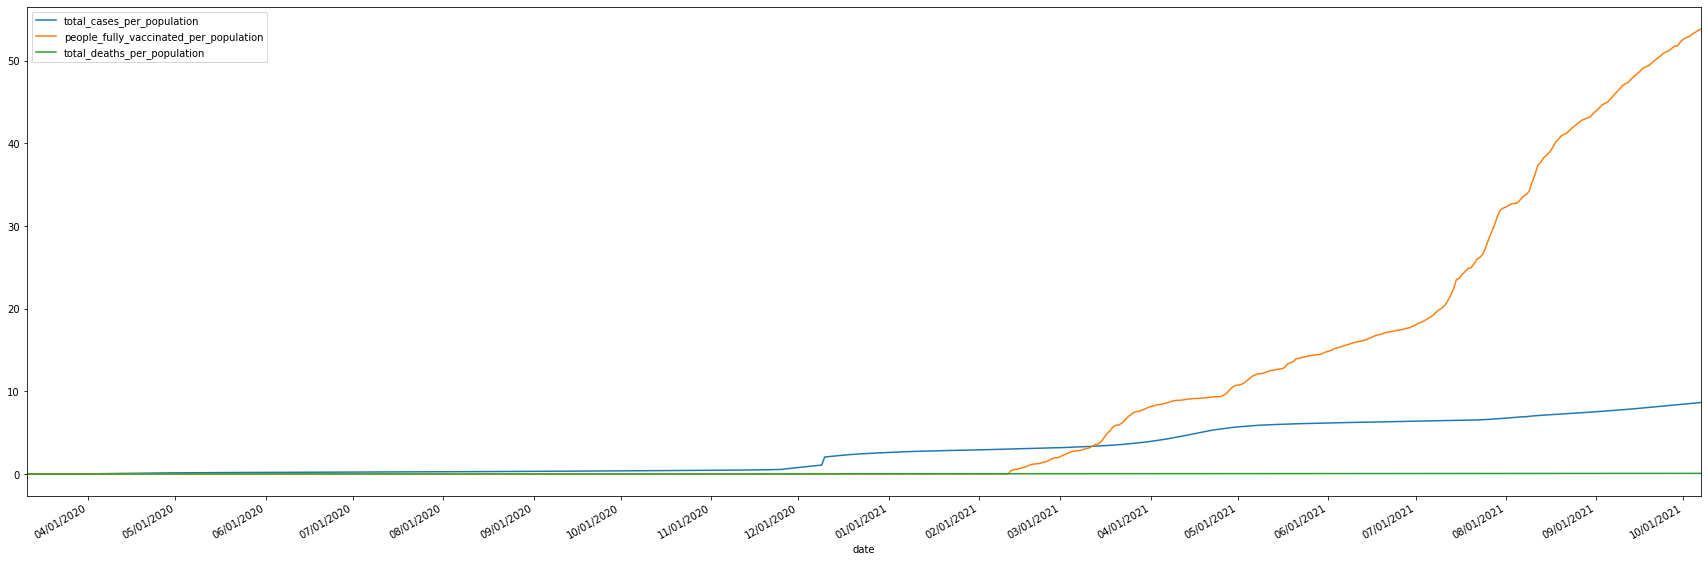

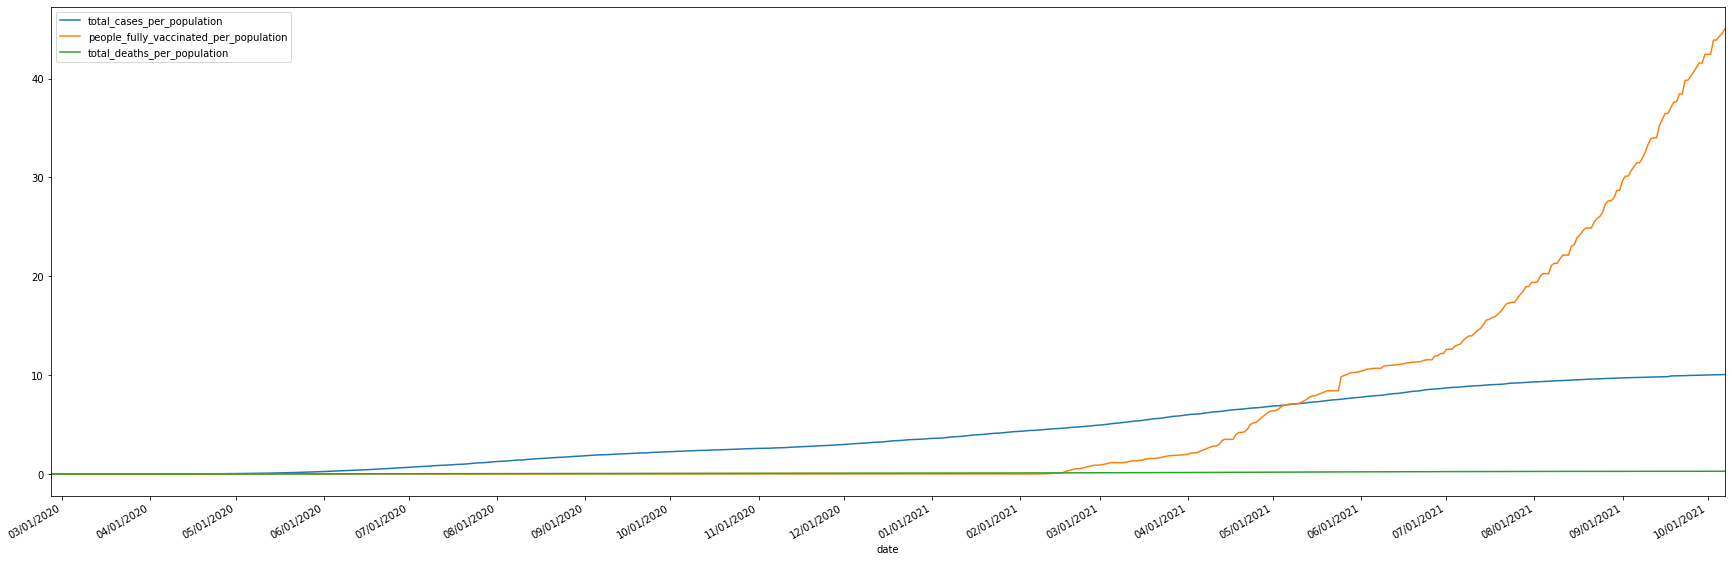

In [17]:
for country in sample_countries:
    ax=df[df.location==country].plot.line(x='date',y=['total_cases_per_population' ,'people_fully_vaccinated_per_population' ,'total_deaths_per_population'],figsize=(30,10))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    # added
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()
    plt.savefig('output\\charts\\' + 'total_cases_per_population-people_fully_vaccinated_per_population-total_deaths_per_population__'+country+'.png')
    plt.show()


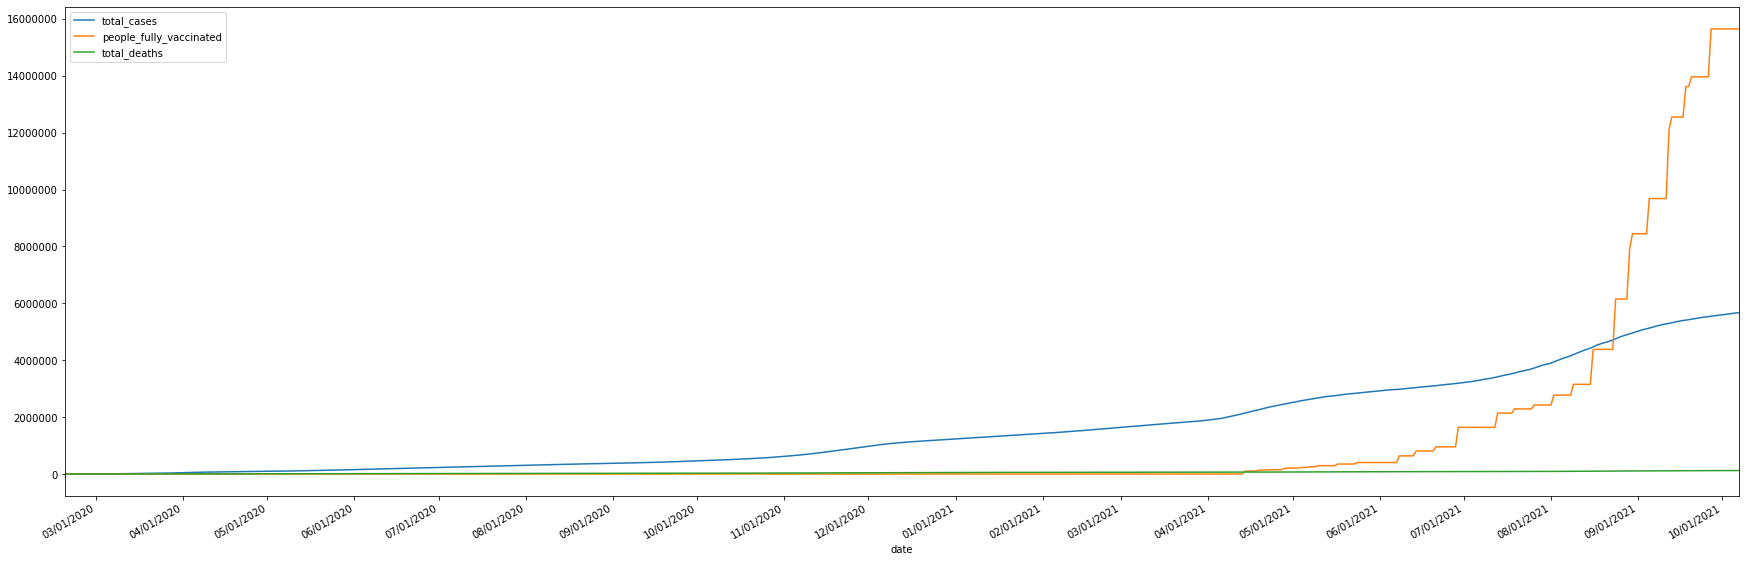

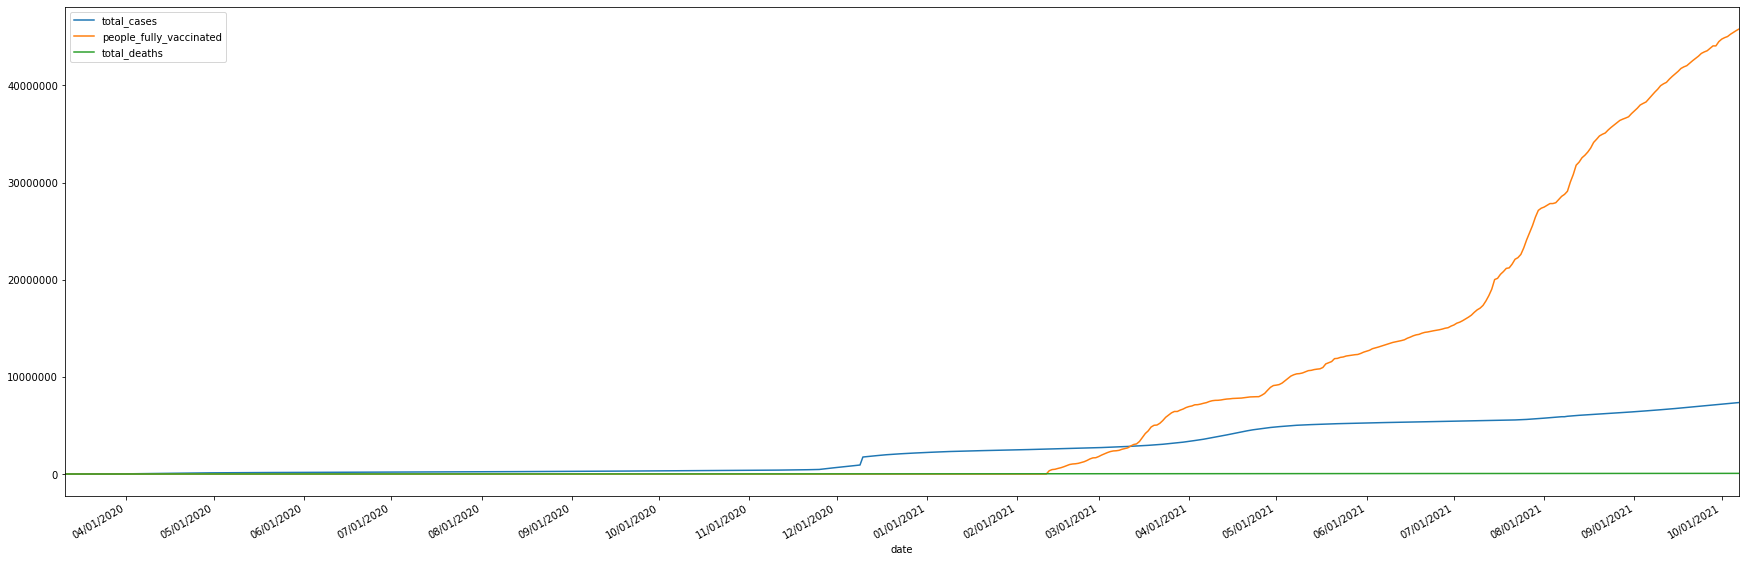

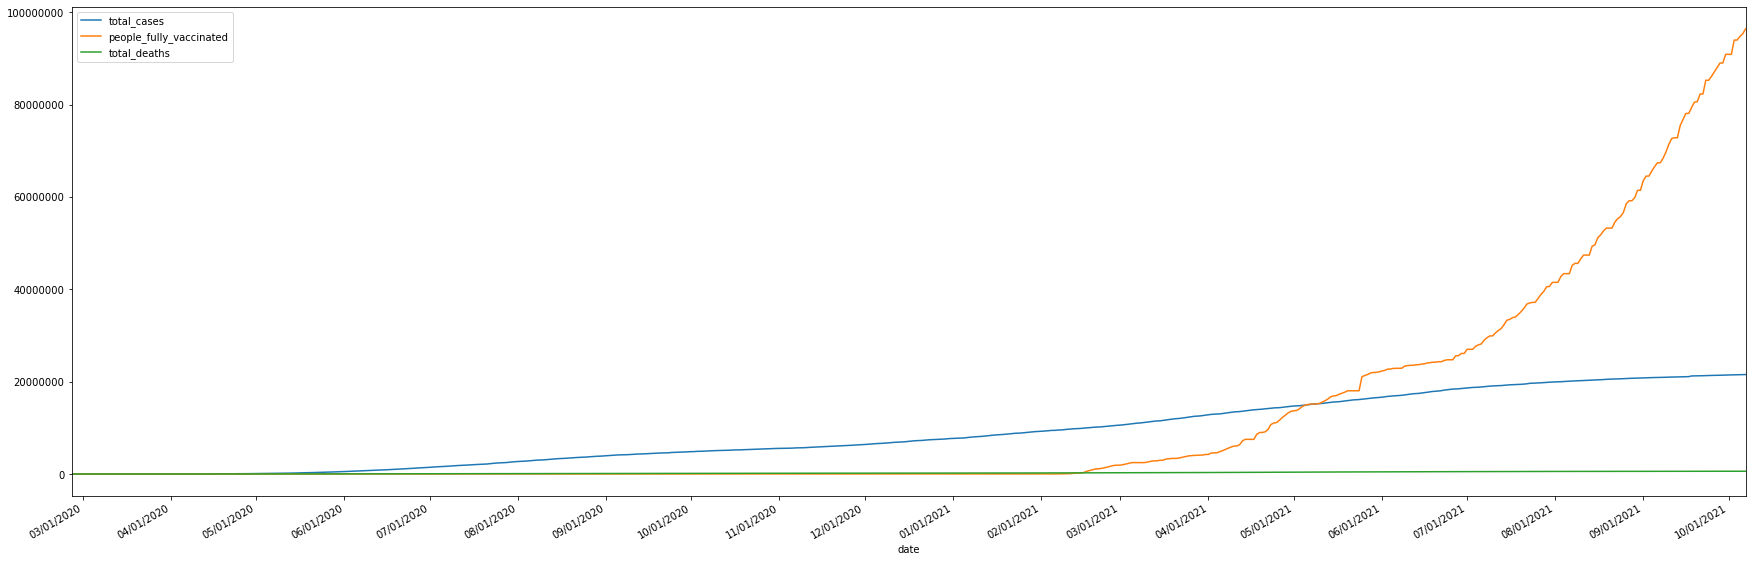

In [18]:

for country in sample_countries:

    ax=df[df.location==country].plot.line(x='date',y=['total_cases' ,'people_fully_vaccinated' ,'total_deaths'],figsize=(30,10))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    # added
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()
    plt.savefig('output\\charts\\' + 'total_cases-people_fully_vaccinated-total_deaths__'+country+'.png')
    plt.show()

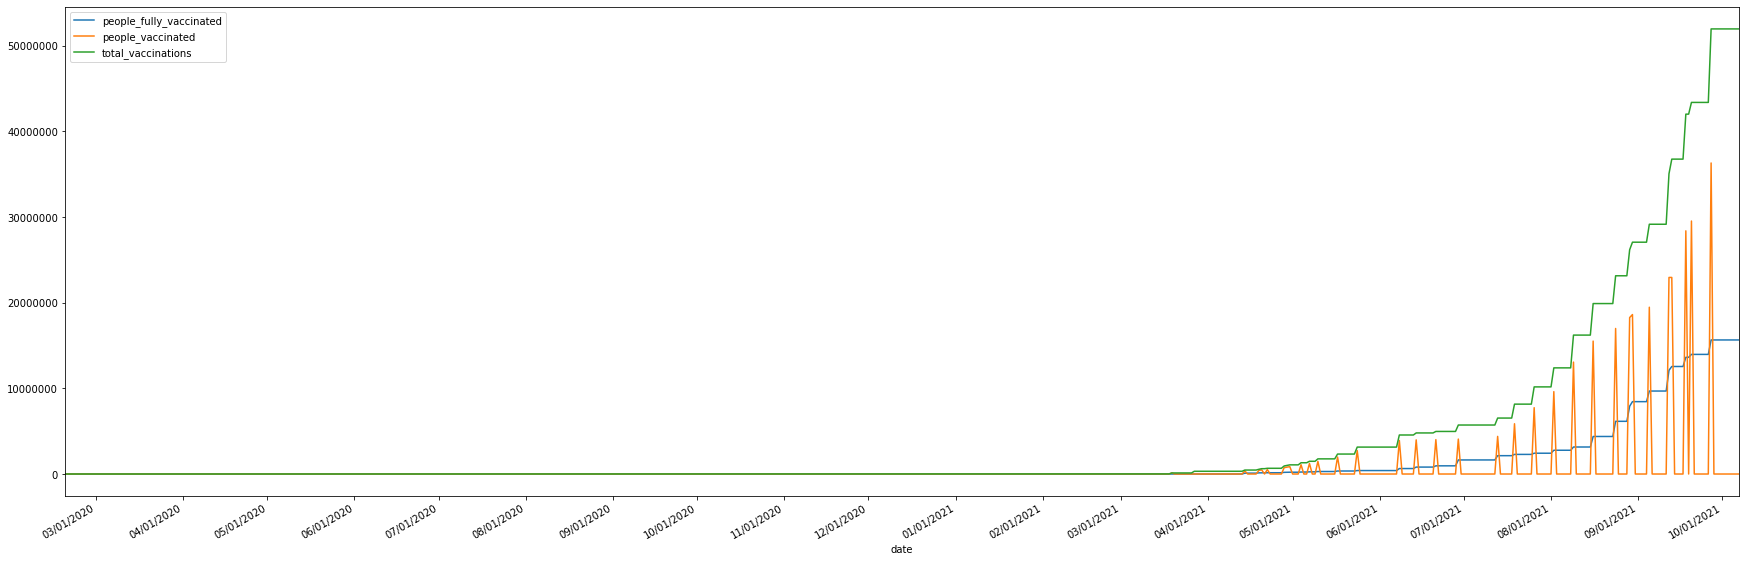

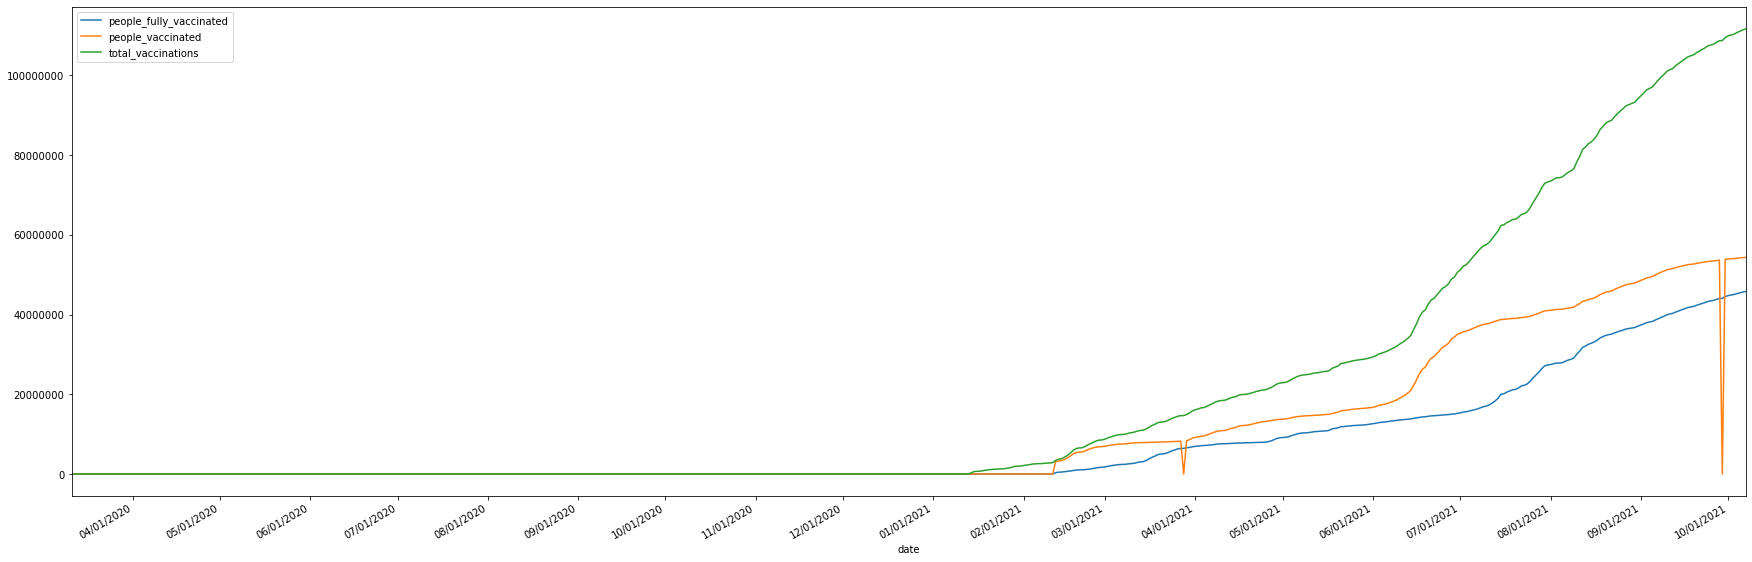

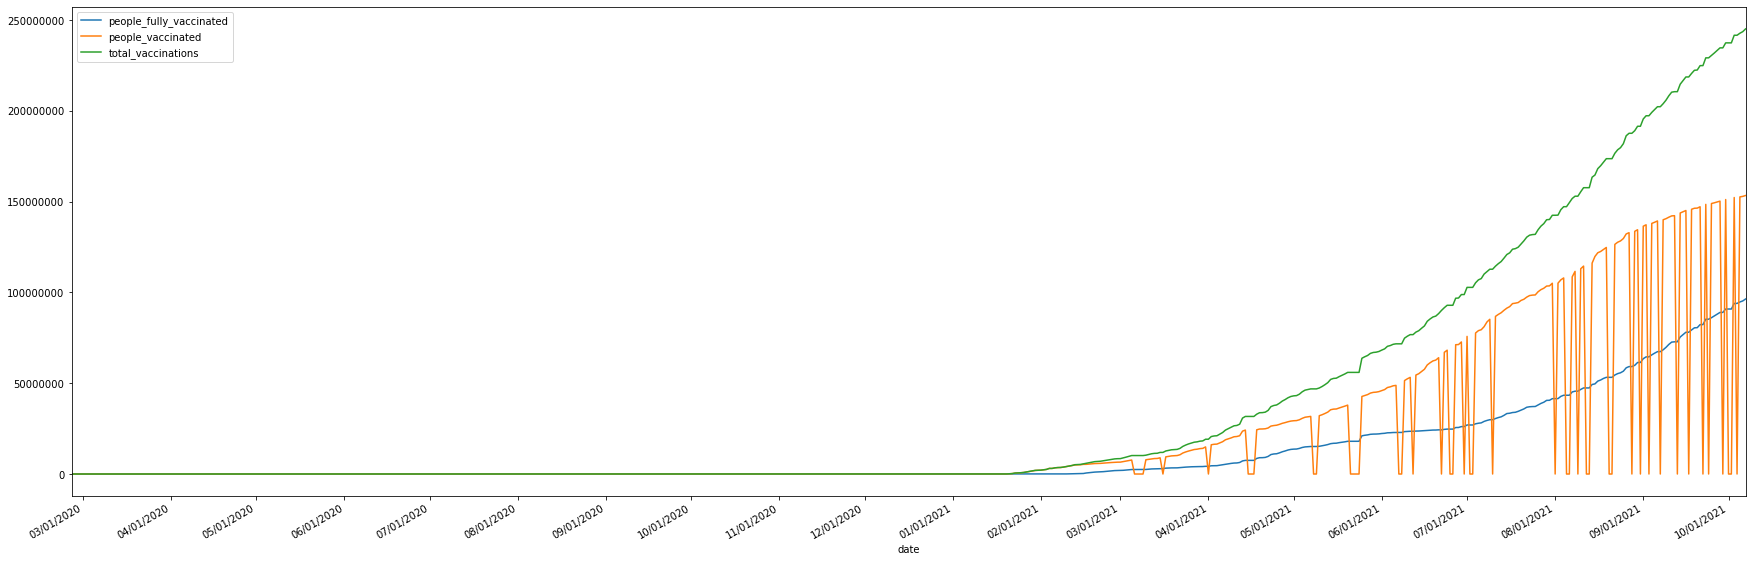

In [19]:

for country in sample_countries:
    ax=df[df.location==country].plot.line(x='date',y=['people_fully_vaccinated' , 'people_vaccinated' , 'total_vaccinations'],figsize=(30,10))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    # added
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()
    plt.savefig('output\\charts\\' + 'people_fully_vaccinated-people_vaccinated-total_vaccinations__'+country+'.png')
    plt.show()


In [20]:
# ps=df.groupby('continent').max().reset_index()
# ax=ps.plot.bar(x='continent',y=['people_vaccinated' , 'people_vaccinated' , 'total_vaccinations'],figsize=(30,10))
# ax

In [21]:
# ax=ps.plot.bar(x='continent',y=['total_cases' , 'people_fully_vaccinated' , 'total_deaths'],figsize=(30,10))
# ax

In [22]:
# ps

In [23]:
# for cont in set(df.continent):
#     print(str(cont) + ':')
#     df[df.continent==cont].plot.line(x='date',y=['total_cases' , 'people_fully_vaccinated' , 'total_deaths'],figsize=(30,10))


In [24]:
# for cont in set(df.continent):
#     print(str(cont) + ':')
#     df[df.continent==cont].plot.line(x='date',y=['people_vaccinated' , 'people_vaccinated' , 'total_vaccinations'],figsize=(30,10))

nan:


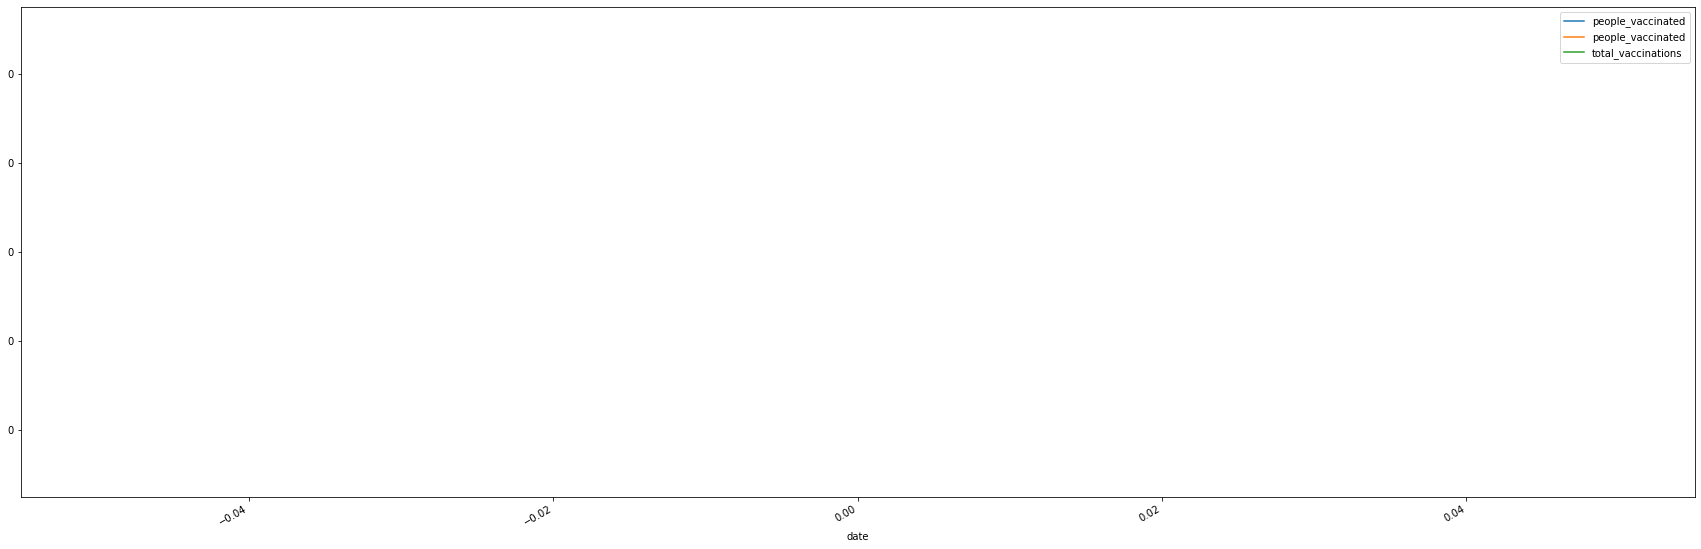

Africa:


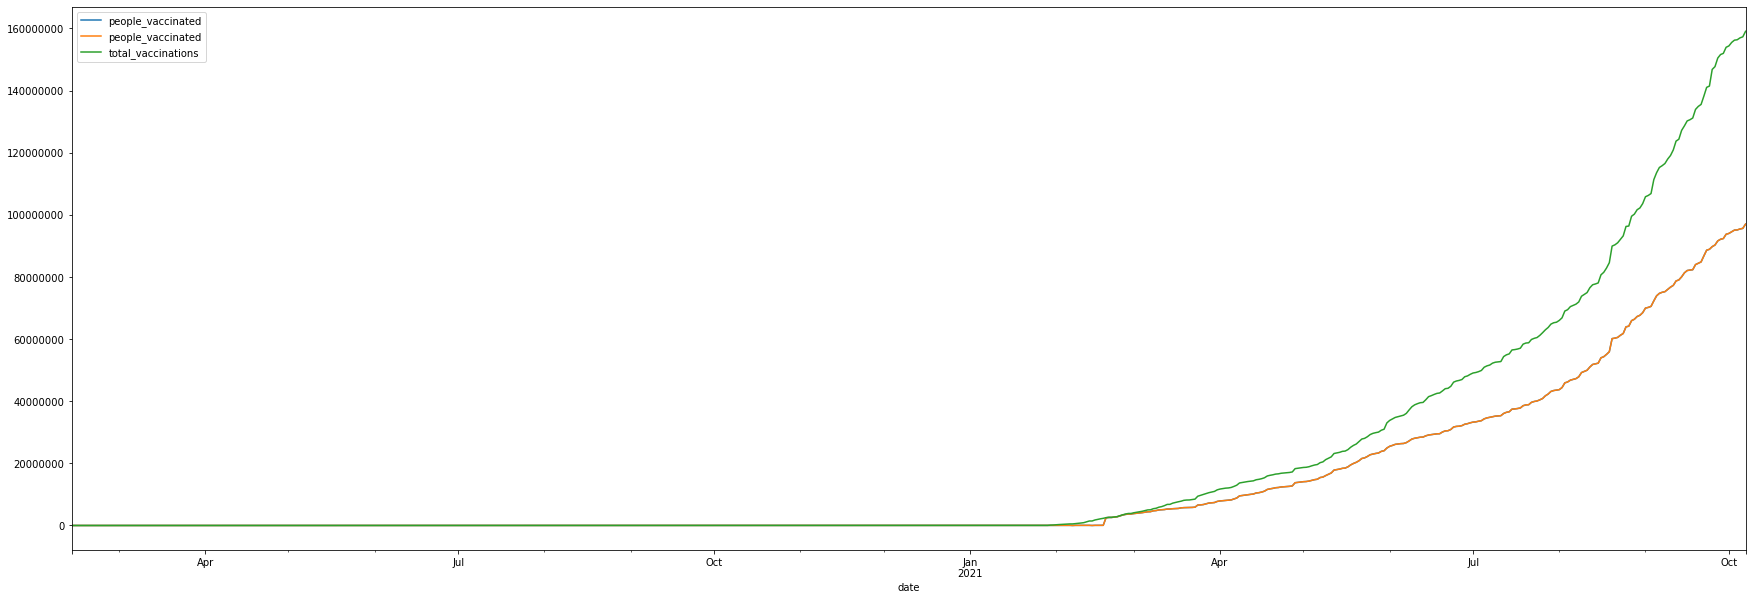

Oceania:


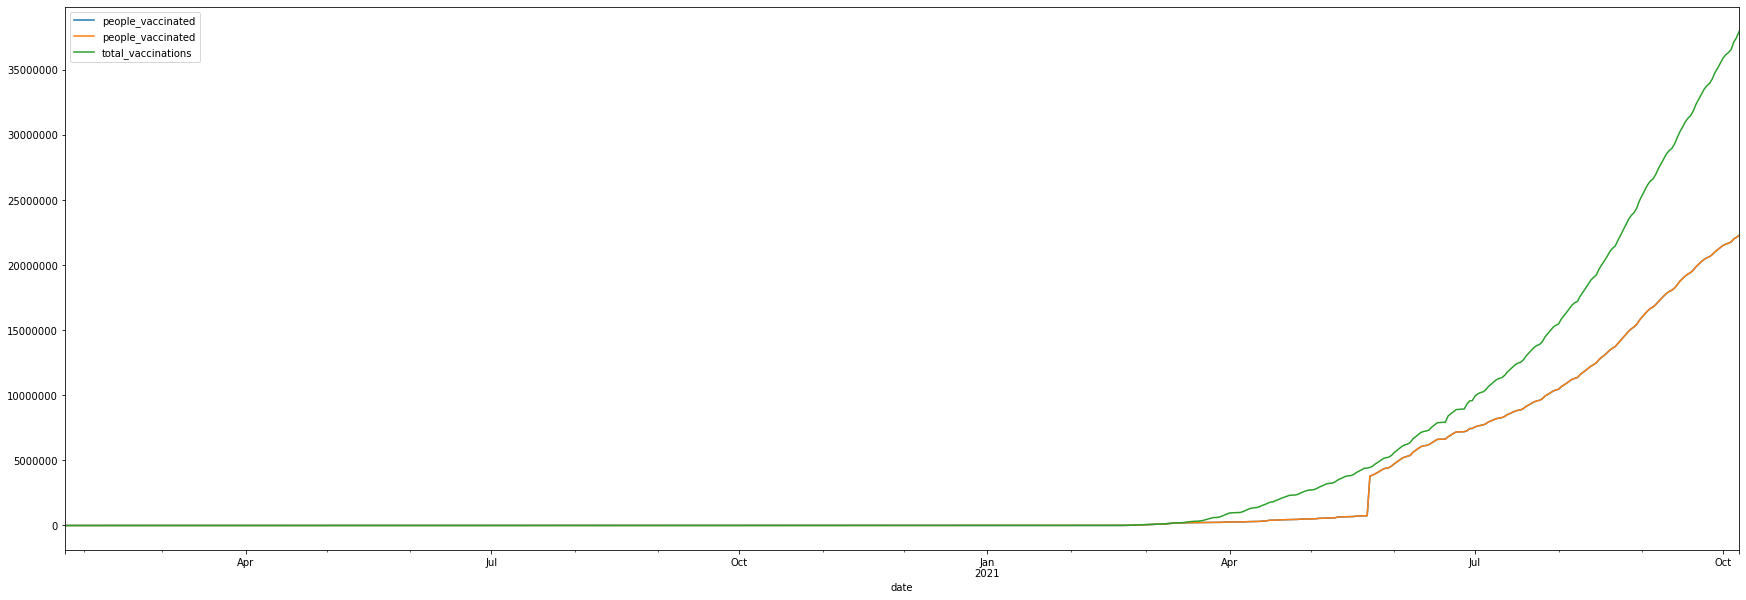

South America:


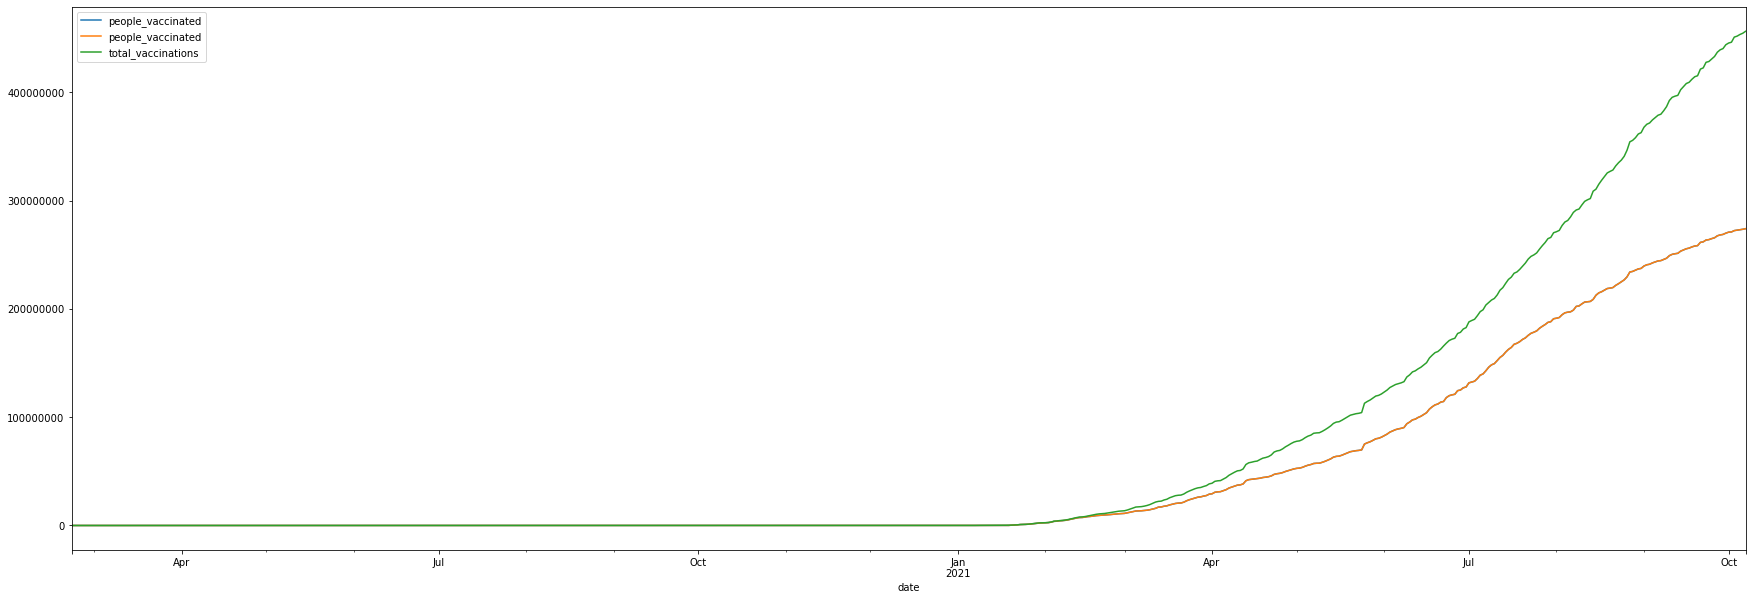

Europe:


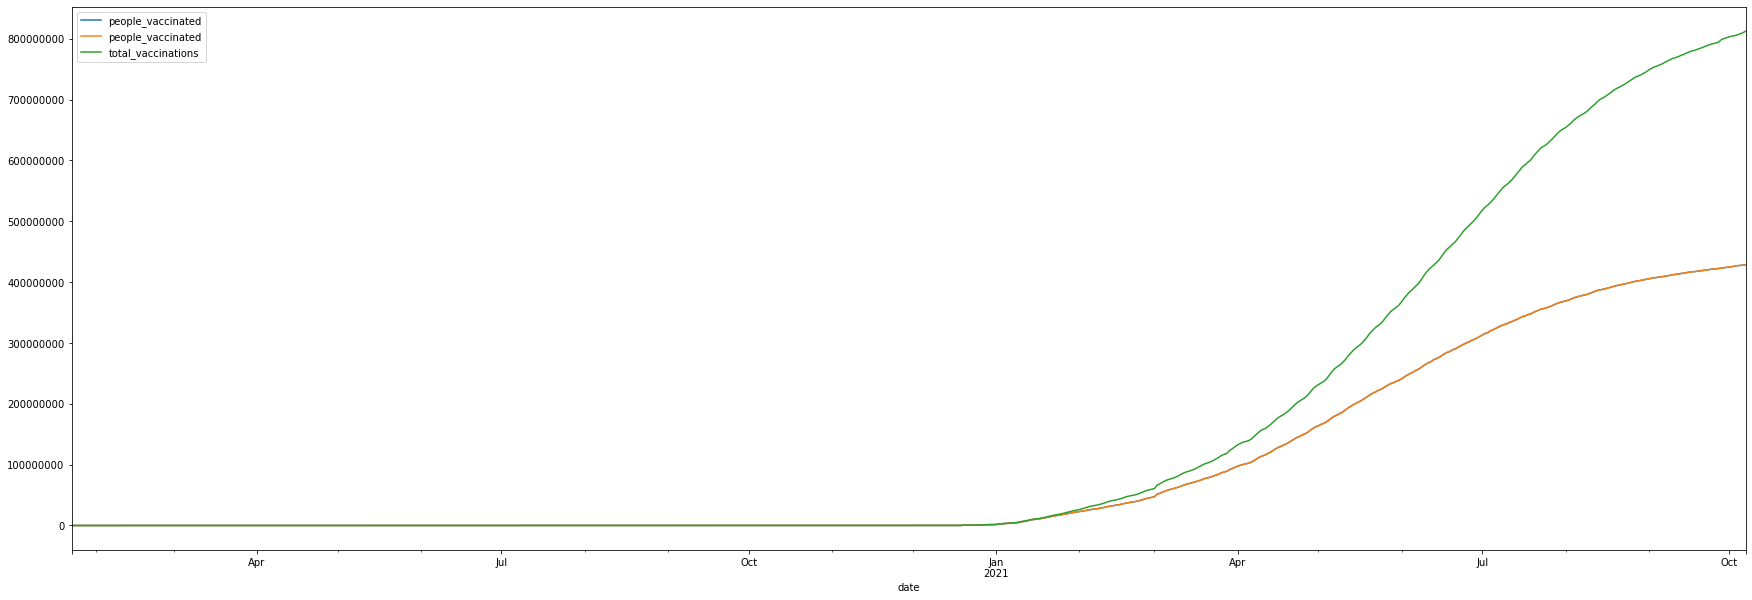

Asia:


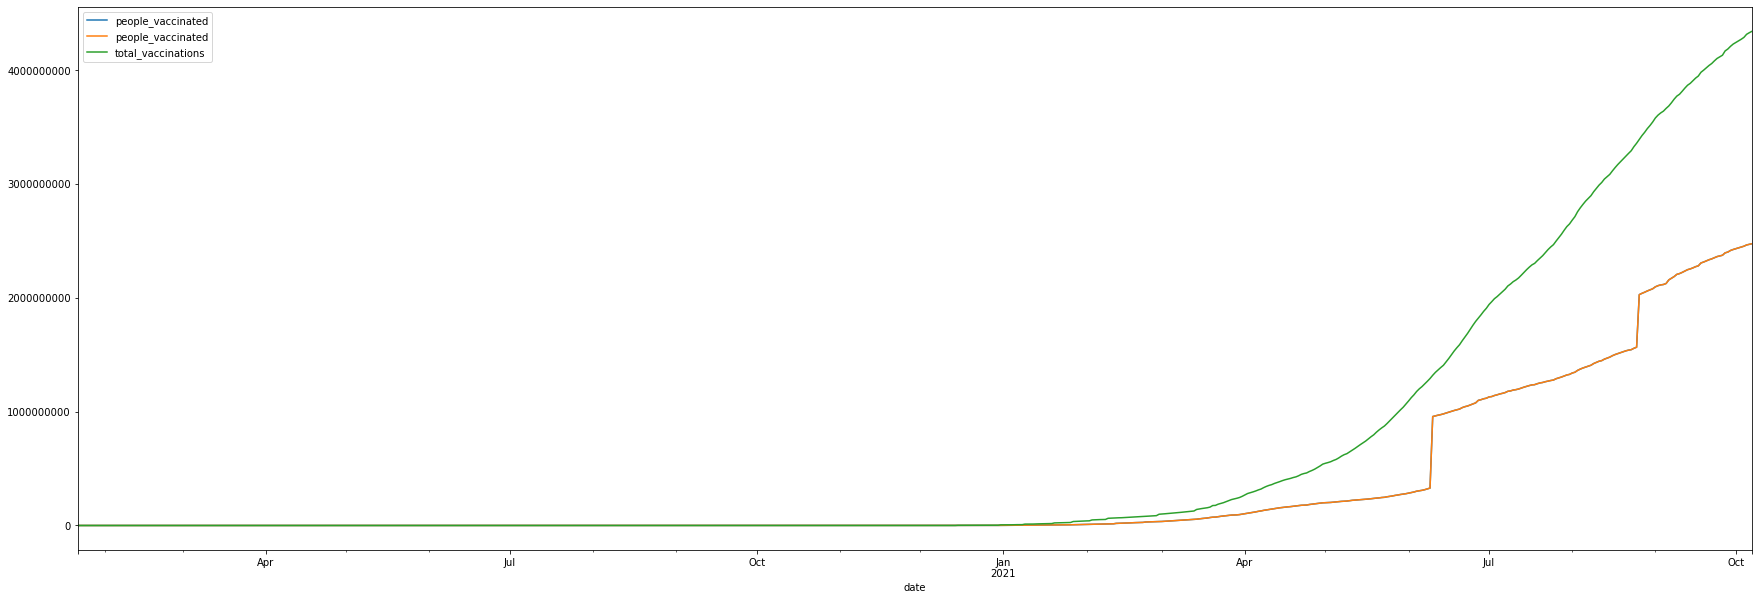

North America:


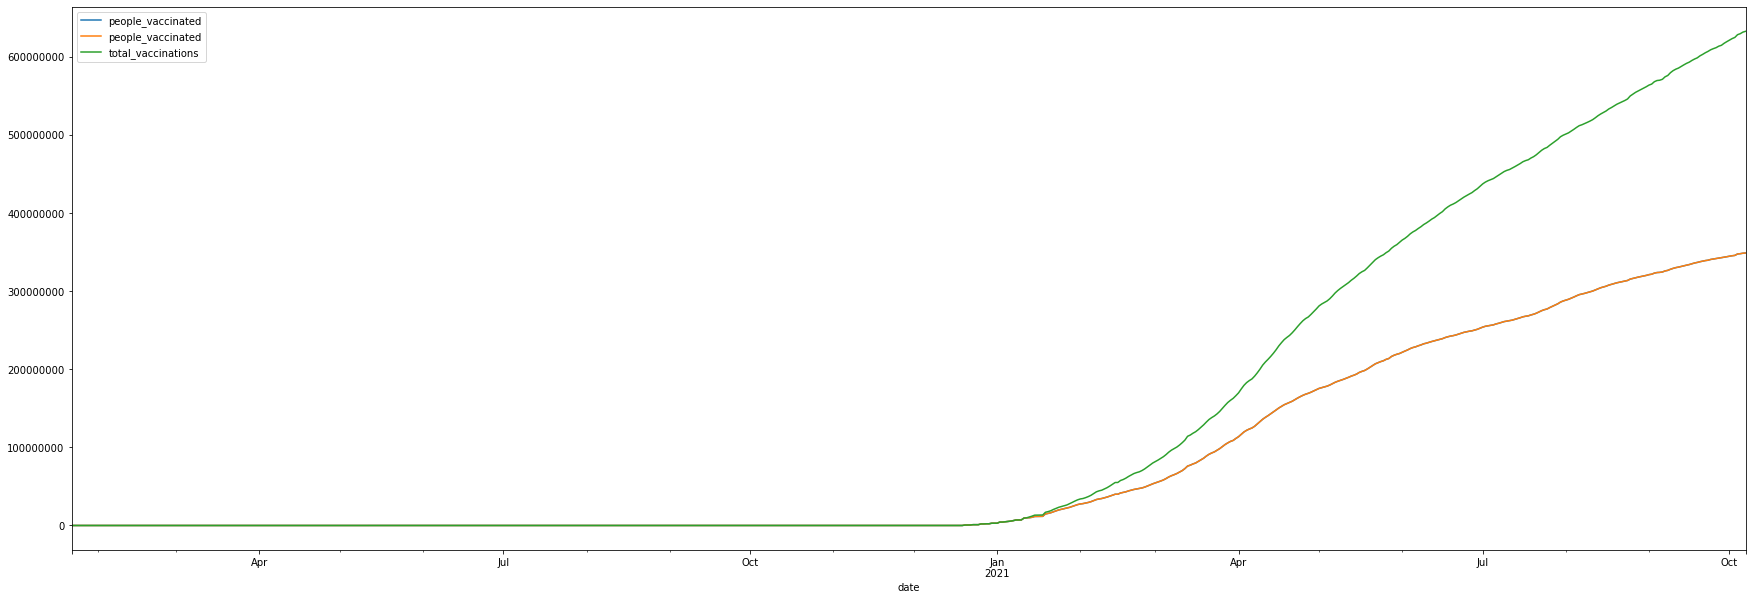

In [25]:
for cont in set(df.continent):
    print(str(cont) + ':')
    plot= df[df.location==cont].plot.line(x='date',y=['people_vaccinated' , 'people_vaccinated' , 'total_vaccinations'],figsize=(30,10))
    # added
    plot.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    fig = plot.get_figure()
    fig.savefig("output\\charts\\"+ "people_vaccinated-people_vaccinated-total_vaccinations__"+str(cont)+'.png')
    plt.show()

nan:


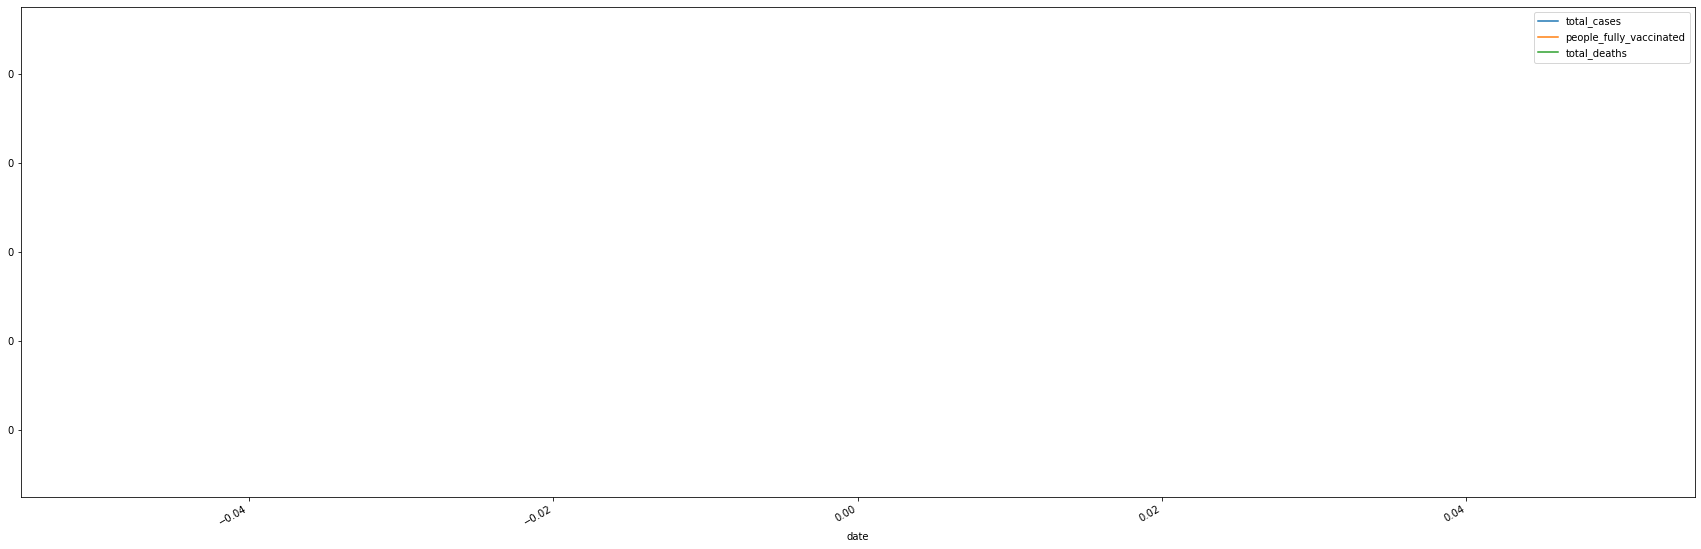

Africa:


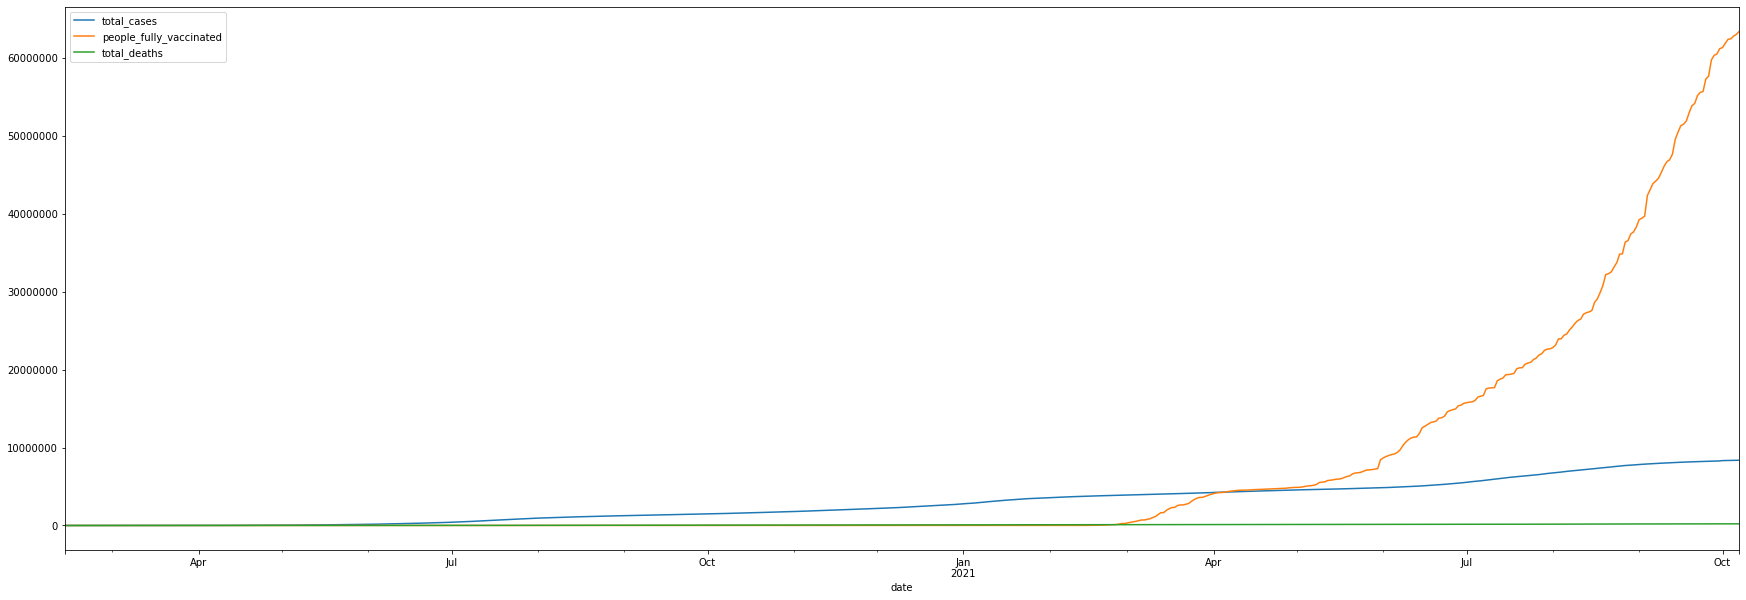

Oceania:


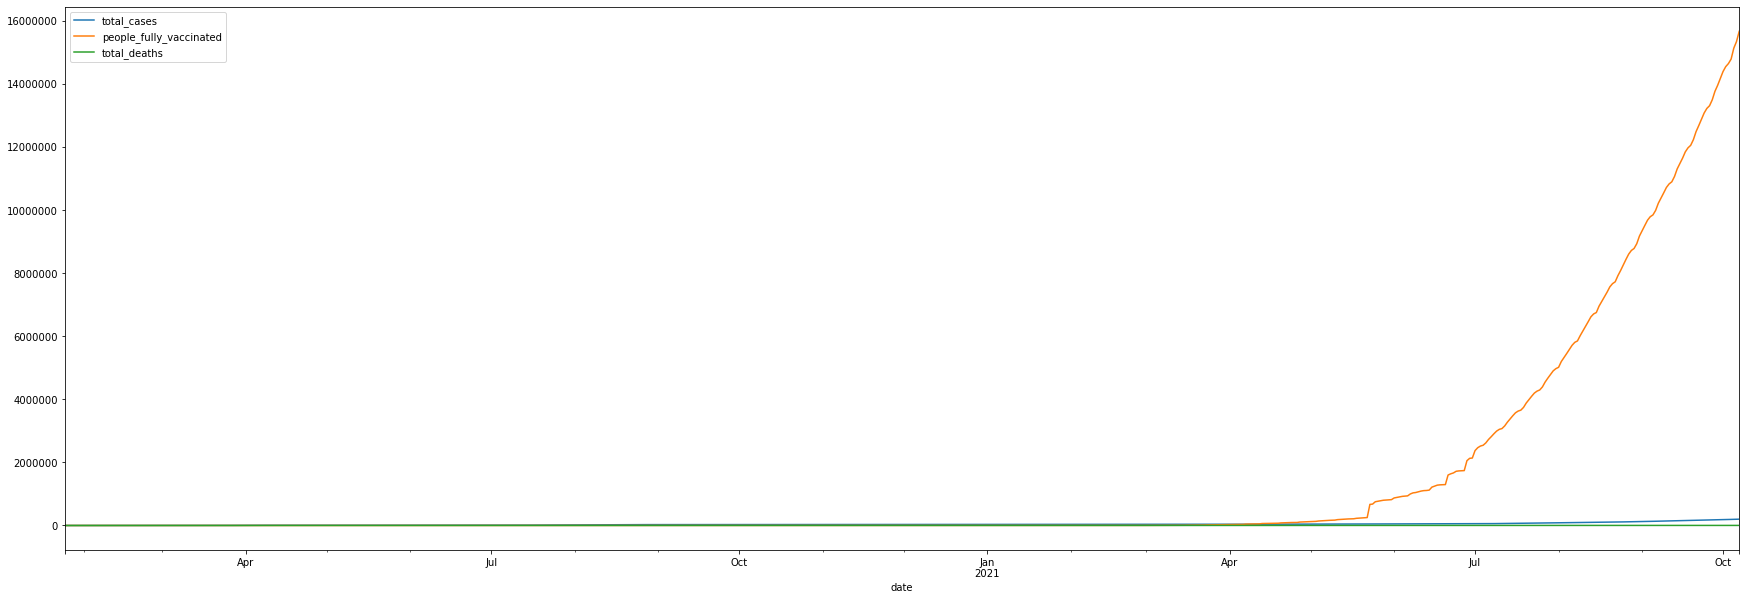

South America:


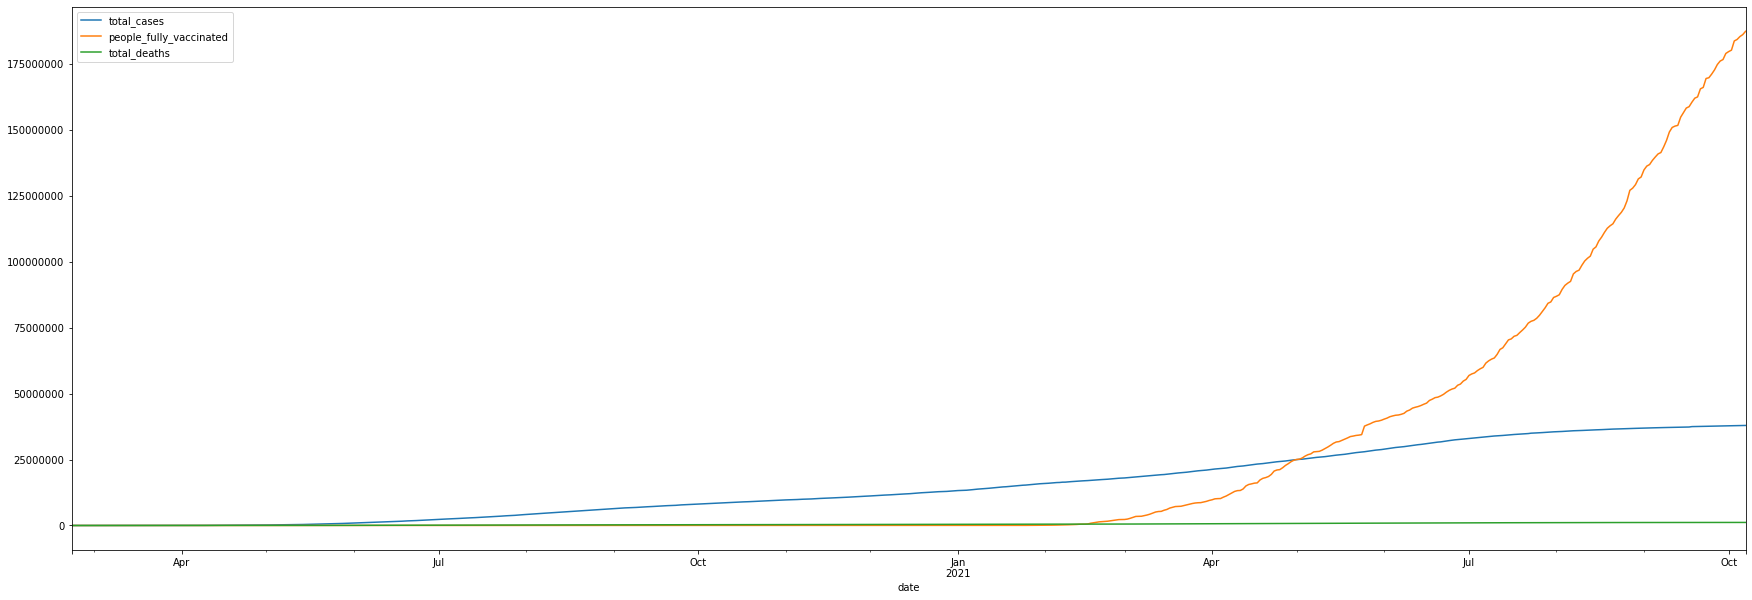

Europe:


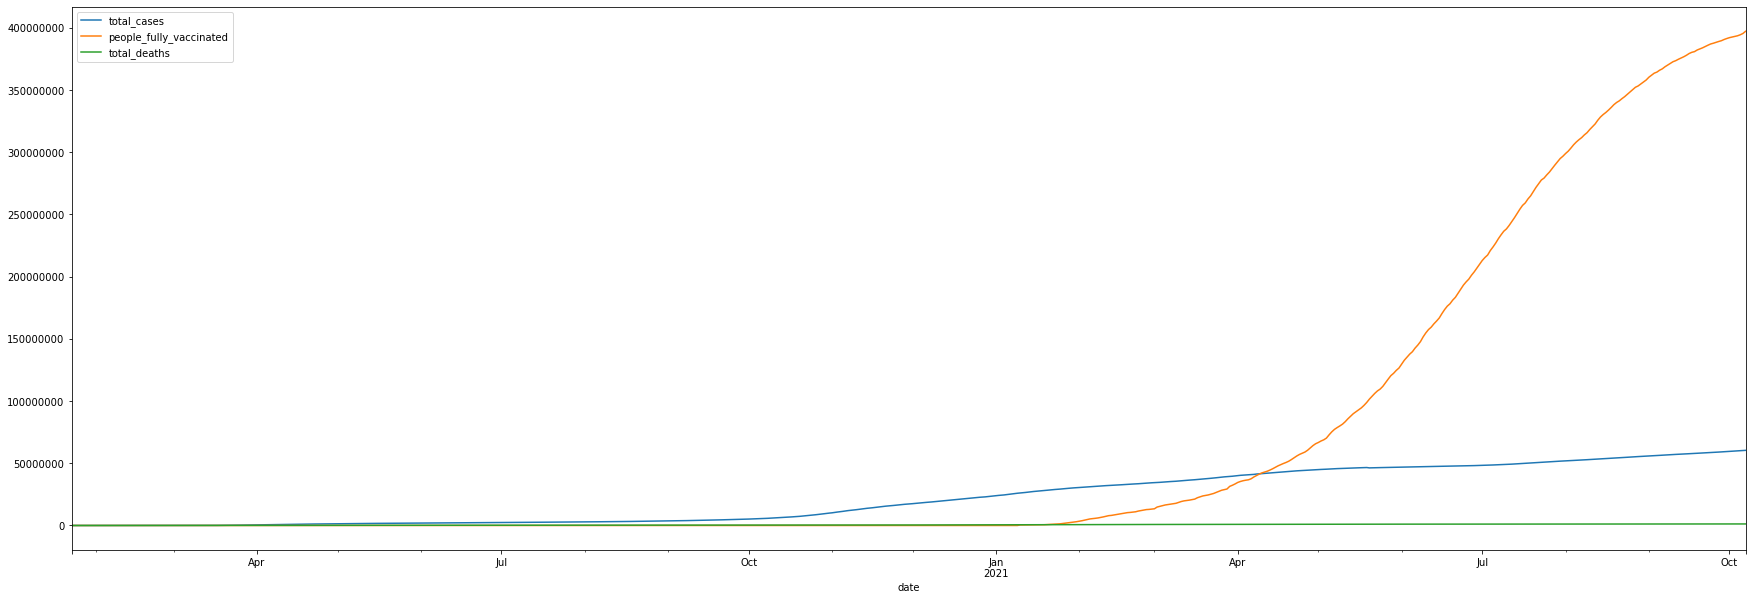

Asia:


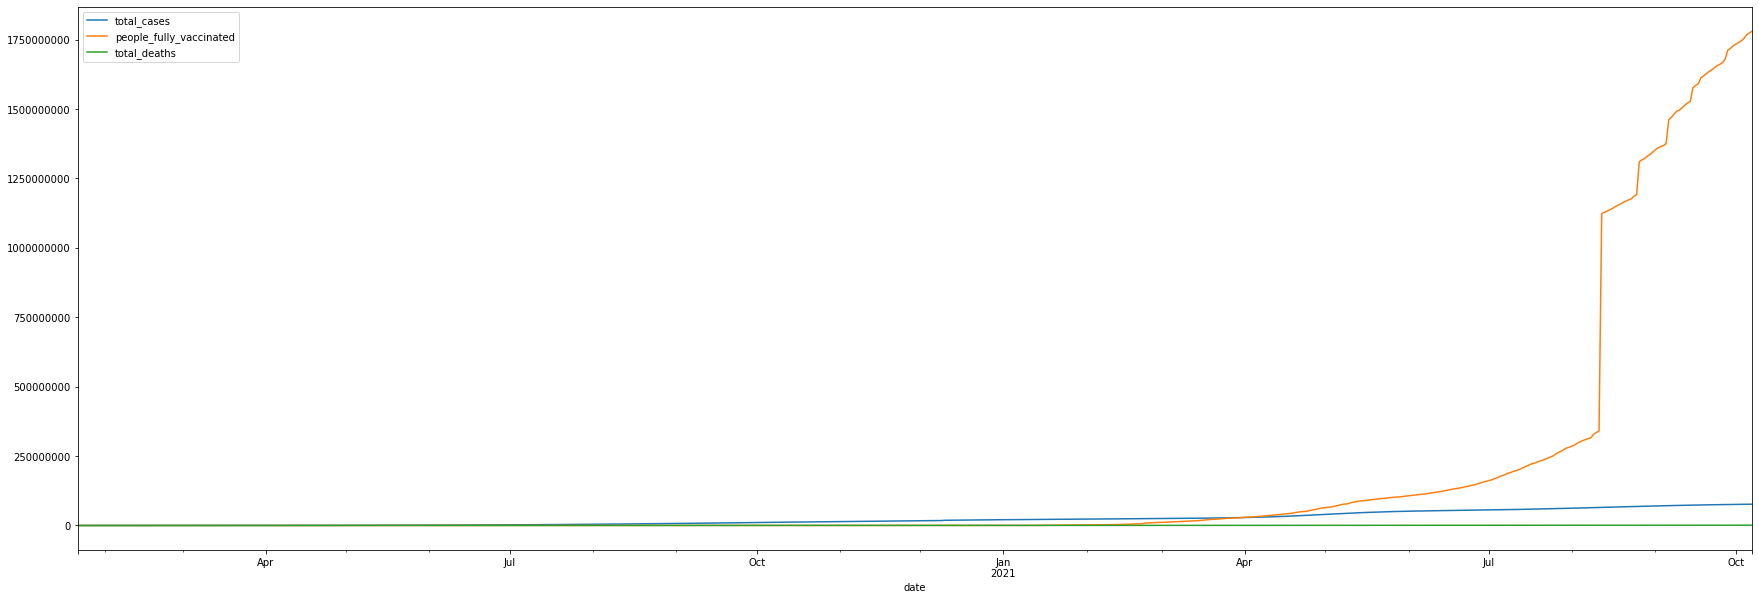

North America:


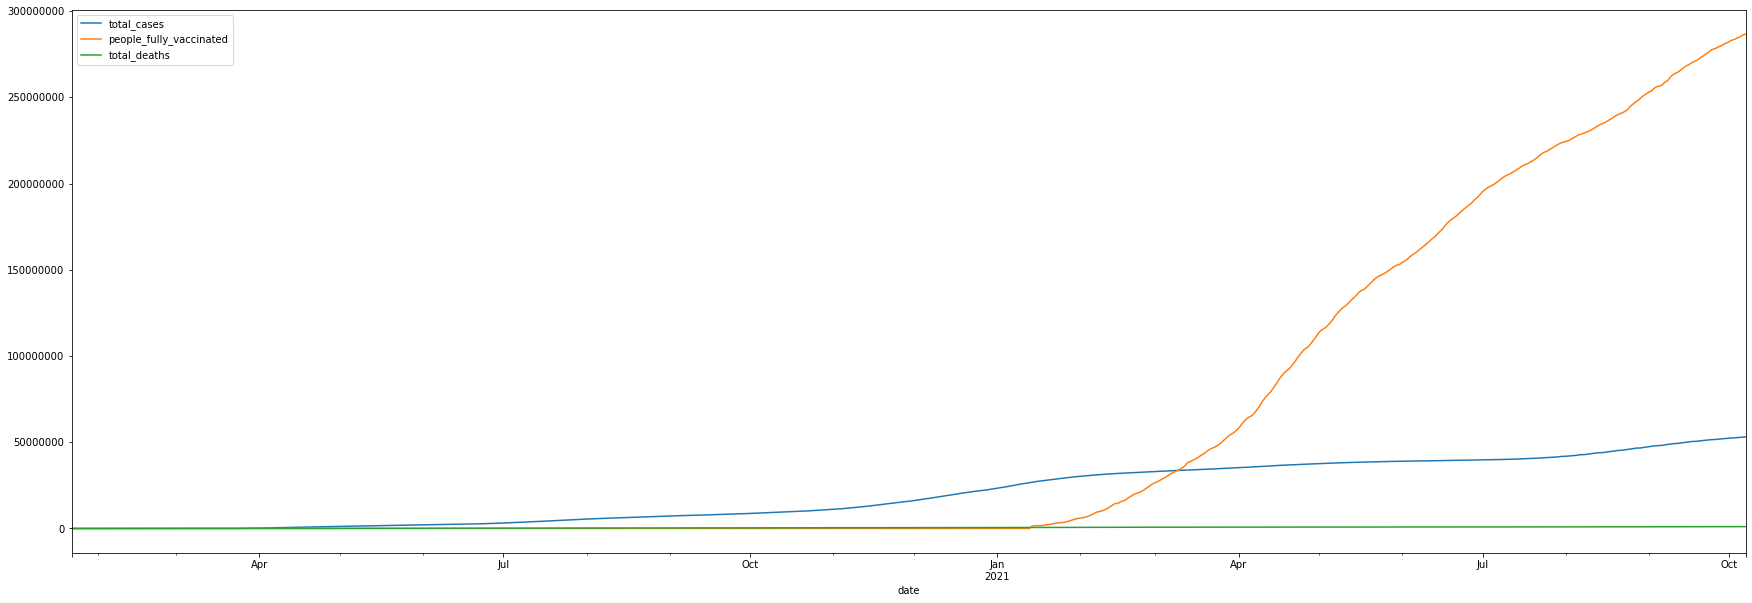

In [26]:
for cont in set(df.continent):
    print(str(cont) + ':')
    plot=df[df.location==cont].plot.line(x='date',y=['total_cases' , 'people_fully_vaccinated' , 'total_deaths'],figsize=(30,10))
    # added
    plot.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    fig = plot.get_figure()
    fig.savefig("output\\charts\\"+"total_cases-people_fully_vaccinated-total_deaths__"+str(cont)+'.png')
    plt.show()

### Task5:

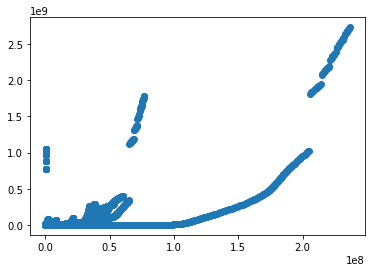

In [27]:
plt.scatter(df.total_cases , df.people_fully_vaccinated)
plt.savefig('output\\charts\\' + 'total_cases-people_fully_vaccinated__scatterplot'+'.png')


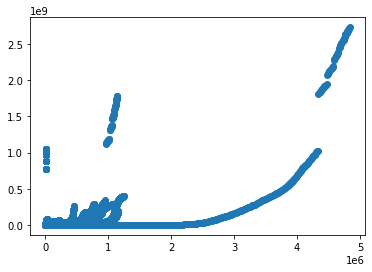

In [28]:
plt.scatter(df.total_deaths ,df.people_fully_vaccinated)
plt.savefig('output\\charts\\' + 'total_deaths-people_fully_vaccinated__scatterplot'+'.png')


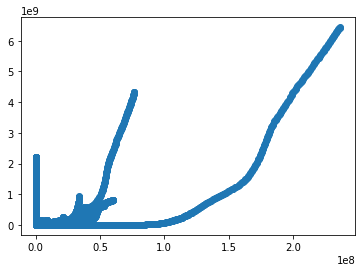

In [29]:
plt.scatter(df.total_cases , df.total_vaccinations)
plt.savefig('output\\charts\\' + 'total_cases-total_vaccinations__scatterplot'+'.png')


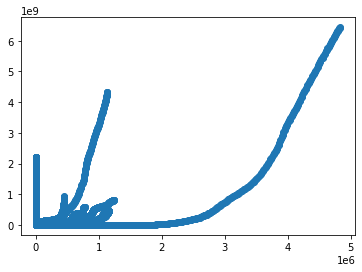

In [30]:
plt.scatter(df.total_deaths ,df.total_vaccinations)
plt.savefig('output\\charts\\' + 'total_deaths-total_vaccinations__scatterplot'+'.png')


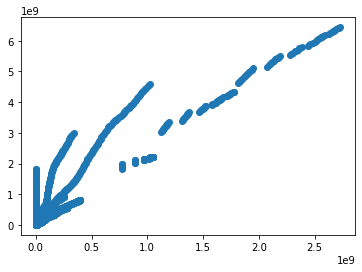

In [31]:
plt.scatter(df.people_fully_vaccinated , df.total_vaccinations)
plt.savefig('output\\charts\\' + 'people_fully_vaccinated-total_vaccinations__scatterplot'+'.png')


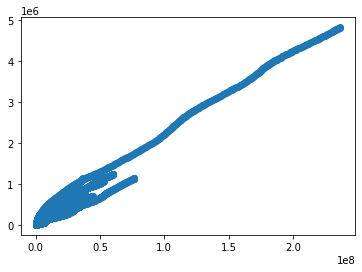

In [32]:
plt.scatter(df.total_cases , df.total_deaths)
plt.savefig('output\\charts\\' + 'total_cases-total_deaths__scatterplot'+'.png')


### Saving DataFrame

In [33]:
df.to_csv('output\\preprocessed_Dataframe\\' + 'preprocessed_df-Complete.csv')